In [ ]:
# Let's load the Excel file and inspect the data first to understand its structure.
import pandas as pd

# Load the Excel file
file_path = '/Local public Transportation Survey (Responses).xlsx'
excel_data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure
excel_data.head()


,Timestamp,Full Name,Gmail,What is your age group?,What is your primary occupation?,How often do you use public transportation?,What modes of public transportation do you typically use?,What is the primary purpose of your trips using public transportation?,How easy is it to access public transportation from your home?,Are public transportation options available during the times you need them?,...,How would you rate the cost of public transportation in your area?,How comfortable do you find the public transportation options available?,How would you rate the cleanliness of public transportation vehicles?,"How easy is it to find information about public transportation (e.g., schedules, routes, delays)?",Would you recommend public transportation to others?,What improvements would you like to see in local public transportation?,How responsive is the public transportation authority to complaints and feedback?,"Would you like to see more eco-friendly public transportation options (e.g., electric buses)?",How often do you experience delays when using public transportation?,Please provide any additional comments or suggestions about local public transportation:
0,2024-07-21 13:49:03.735,Ronit Santosh Shetye,ronitshetye0523@gmail.com,18-25,Student,Daily,Train,Commuting to work/school,Neutral,Always,...,Affordable,Neutral,Dirty,Neutral,Maybe,Better cleanliness,Neutral,Yes,Always,NaN
1,2024-07-21 13:58:15.198,Manthan p more,moremanthan786@gmail.com,18-25,Employed Full-time,Daily,Train,Commuting to work/school,Neutral,Always,...,Affordable,Comfortable,Neutral,Easy,Yes,Increased frequency of service,Very Responsible,Yes,Sometimes,NaN
2,2024-07-21 13:59:30.068,Ayush Navnath Sarode,ayushhh073@gmail.com,18-25,Student,Daily,Train,Commuting to work/school,Easy,Often,...,Affordable,Neutral,Clean,Easy,Maybe,Increased frequency of service,Unresponsive,Yes,Always,NaN
3,2024-07-21 14:02:25.778,Shweta Govind More,Shwetamore2127@gmail.com,18-25,Employed Part-time,Daily,Train,Job,Easy,Always,...,Affordable,Comfortable,Clean,Easy,Yes,Increased frequency of service,Very Responsible,Yes,Sometimes,NaN
4,2024-07-21 14:14:09.971,Srushti Jitendra Patil,srushti2512patil@gmail.com,18-25,Student,Daily,Bus,Commuting to work/school,Neutral,Often,...,Affordable,Neutral,Neutral,Neutral,Yes,Expanded routes,Neutral,Yes,Sometimes,NaN


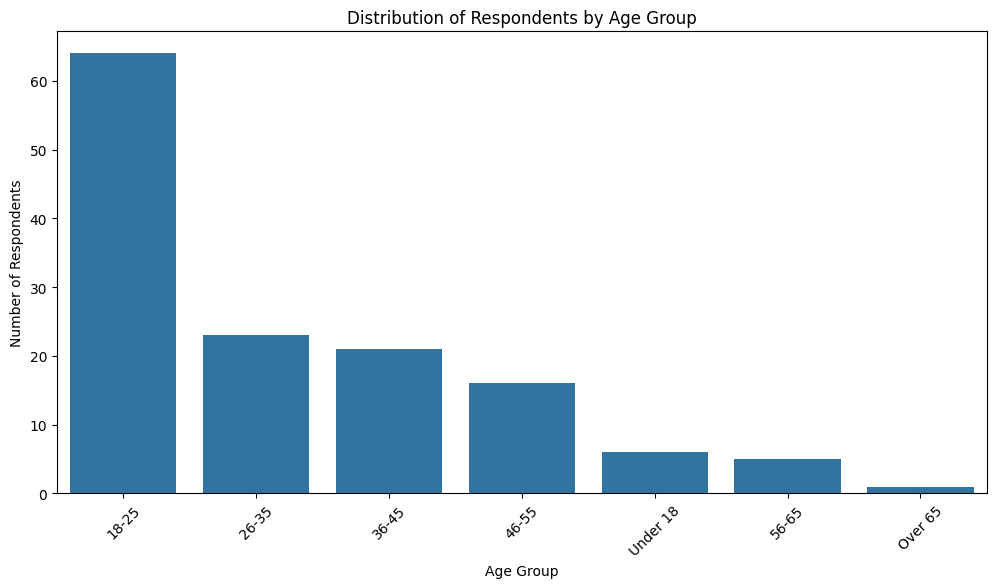

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a larger figure size for better readability in visualizations
plt.figure(figsize=(12, 6))

# Distribution of Age Group
age_group_distribution = excel_data['What is your age group?'].value_counts()
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values)
plt.title('Distribution of Respondents by Age Group')
plt.ylabel('Number of Respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


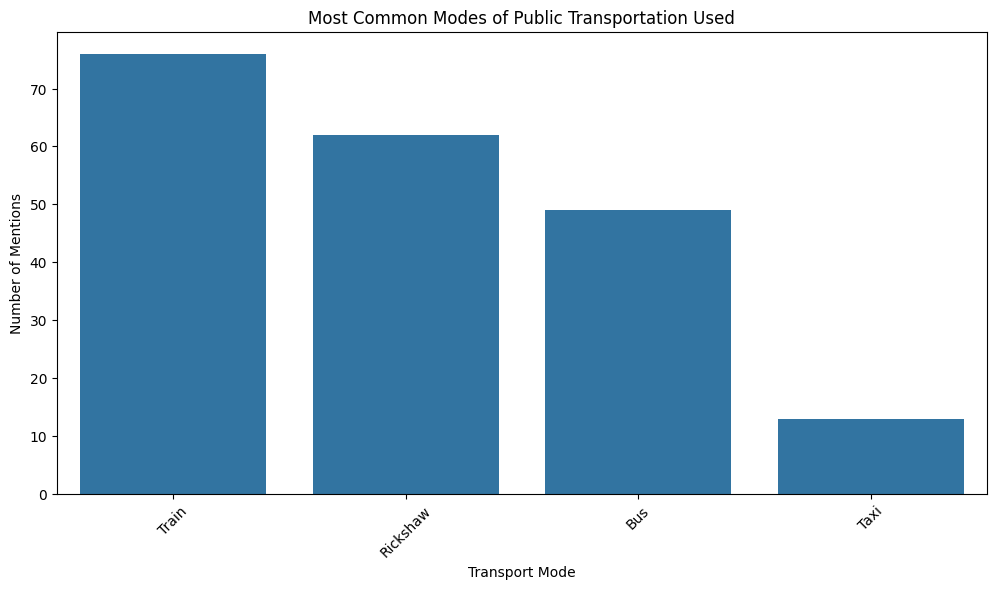

In [ ]:
# Plotting the distribution of public transport modes used by respondents
plt.figure(figsize=(12, 6))

# Extracting and counting transport modes (splitting because multiple modes can be mentioned)
modes_of_transport = excel_data['What modes of public transportation do you typically use?'].str.split(',').explode().str.strip()
transport_mode_distribution = modes_of_transport.value_counts()

# Plotting the distribution
sns.barplot(x=transport_mode_distribution.index, y=transport_mode_distribution.values)
plt.title('Most Common Modes of Public Transportation Used')
plt.ylabel('Number of Mentions')
plt.xlabel('Transport Mode')
plt.xticks(rotation=45)
plt.show()


# New section

In [ ]:
# Get descriptive statistics for numeric columns
descriptive_stats = excel_data.describe()
print(descriptive_stats)


                           Timestamp
count                            136
mean   2024-07-21 21:26:49.894933760
min       2024-07-21 13:49:03.735000
25%    2024-07-21 15:06:15.961999872
50%    2024-07-21 18:14:24.511000064
75%    2024-07-21 22:42:12.469250048
max       2024-07-24 22:30:09.020000


In [ ]:
# Frequency analysis for categorical variables
categorical_columns = excel_data.select_dtypes(include=['object']).columns

# Calculate frequency for each categorical column
frequency_analysis = {}
for col in categorical_columns:
    frequency_analysis[col] = excel_data[col].value_counts()

# Display frequency analysis
for key, value in frequency_analysis.items():
    print(f"\nFrequency for {key}:\n{value}\n")



Frequency for Full Name:
Full Name
Manthan p more         2
Tushar pushilkar       1
Dakshayani Brid        1
Rakshitha Shetty       1
Paresh A. Singasane    1
                      ..
Tanvi Sudhir Kadam     1
Manisha                1
Namrata Kamble         1
Harsh Chorat           1
Jay surendra sakpal    1
Name: count, Length: 135, dtype: int64


Frequency for Gmail:
Gmail
moremanthan786@gmail.com             2
Polekarcj@gmail.com                  2
akshaykhedekar518@gmail.com          2
tushardp6@gmail.com                  1
rakshithashetty03091999@gmail.com    1
                                    ..
Prajaktakadam0201@gmail.com          1
Kadamtanvi1978@gmail.com             1
manishadalvi0106@gmail.com           1
namratakamble1994@gmail.com          1
jsakpal076@gmail.com                 1
Name: count, Length: 133, dtype: int64


Frequency for What is your age group?:
What is your age group?
18-25       64
26-35       23
36-45       21
46-55       16
Under 18     6
56-65        

In [ ]:
# Example of cross-tabulation: Age group vs Satisfaction
cross_tab = pd.crosstab(excel_data['What is your age group?'],
                         excel_data['What modes of public transportation do you typically use?'],
                         margins=True, margins_name="Total")

# Display the cross-tabulation
print(cross_tab)


What modes of public transportation do you typically use?  Bus  Bus, Rickshaw  \
What is your age group?                                                         
18-25                                                       15              0   
26-35                                                        5              0   
36-45                                                        4              0   
46-55                                                        1              1   
56-65                                                        1              0   
Over 65                                                      0              1   
Under 18                                                     0              1   
Total                                                       26              3   

What modes of public transportation do you typically use?  Bus, Rickshaw, Taxi  \
What is your age group?                                                          
18-25                    

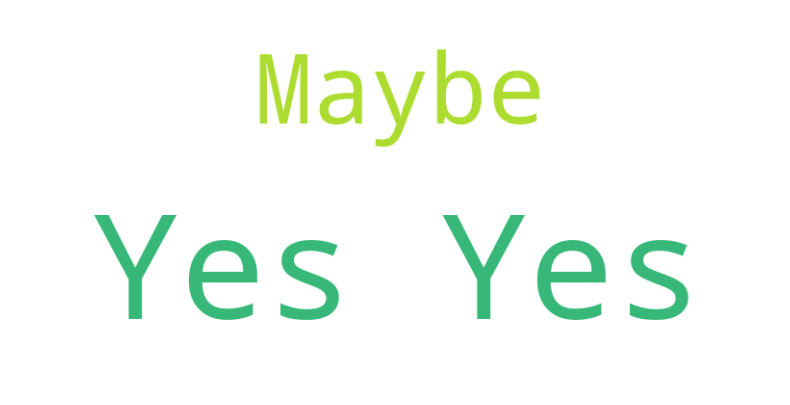

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming there's a column 'Suggestions for improvement'
suggestions = excel_data['Would you recommend public transportation to others?'].dropna().str.cat(sep=' ')

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(suggestions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


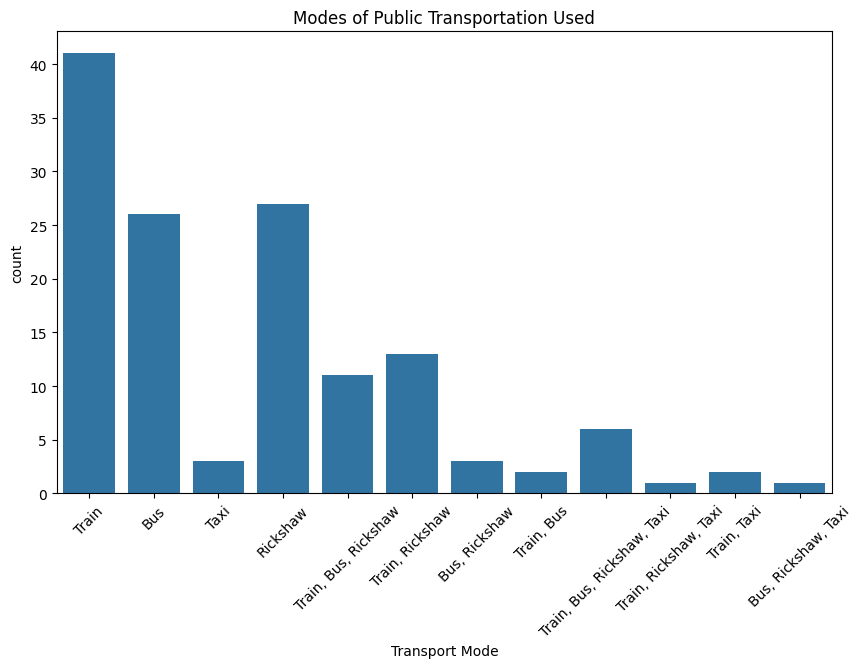

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for the frequency of a specific categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(data=excel_data, x='What modes of public transportation do you typically use?')
plt.title('Modes of Public Transportation Used')
plt.xlabel('Transport Mode')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/Local public Transportation Survey (Responses).xlsx')

# Count missing values for each column
missing_values = excel_data.isnull().sum()

# Display the missing values count
print("Missing Values Count for Each Column:\n", missing_values[missing_values > 0])


Missing Values Count for Each Column:
 Please provide any additional comments or suggestions about local public transportation:    85
dtype: int64


In [ ]:
# Get a concise summary of the DataFrame
excel_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 21 columns):
 #   Column                                                                                             Non-Null Count  Dtype         
---  ------                                                                                             --------------  -----         
 0   Timestamp                                                                                          136 non-null    datetime64[ns]
 1   Full Name                                                                                          136 non-null    object        
 2   Gmail                                                                                              136 non-null    object        
 3   What is your age group?                                                                            136 non-null    object        
 4   What is your primary occupation?                                                

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = excel_data.isnull().mean() * 100

# Display the percentage of missing values
print("Percentage of Missing Values for Each Column:\n", missing_percentage[missing_percentage > 0])


Percentage of Missing Values for Each Column:
 Please provide any additional comments or suggestions about local public transportation:    62.5
dtype: float64


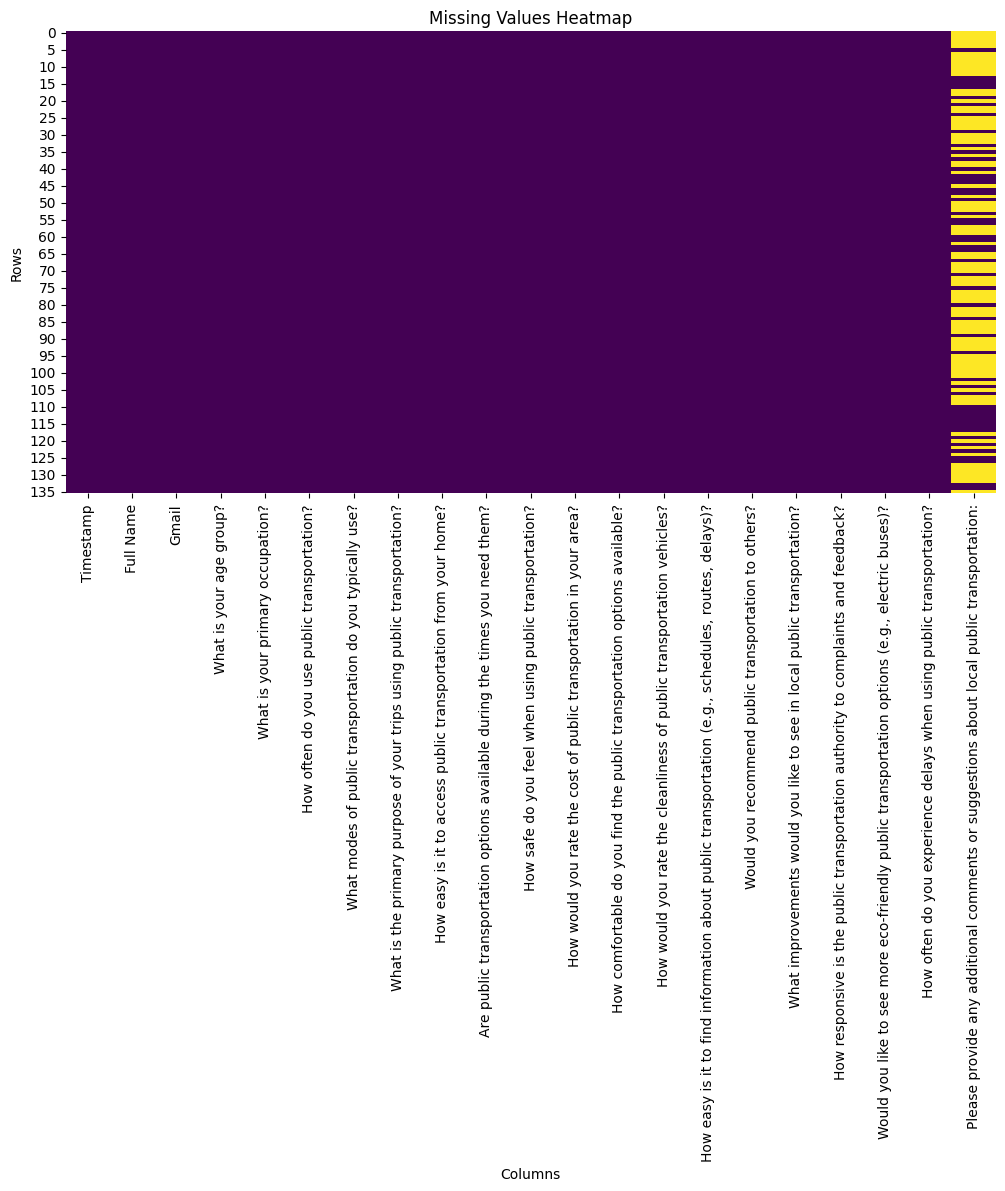

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(excel_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [ ]:
# Display data types and non-null counts
print("Data Types and Non-null Counts:")
print(excel_data.info())


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 21 columns):
 #   Column                                                                                             Non-Null Count  Dtype         
---  ------                                                                                             --------------  -----         
 0   Timestamp                                                                                          136 non-null    datetime64[ns]
 1   Full Name                                                                                          136 non-null    object        
 2   Gmail                                                                                              136 non-null    object        
 3   What is your age group?                                                                            136 non-null    object        
 4   What is your primary occupation?                

In [ ]:
# Get unique values for each categorical column
categorical_columns = excel_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = excel_data[col].unique()
    print(f"Unique values in '{col}': {unique_values}\n")


Unique values in 'Full Name': ['Ronit Santosh Shetye' 'Manthan p more ' 'Ayush Navnath Sarode '
 'Shweta Govind More ' 'Srushti Jitendra Patil ' 'Mangesh ' 'Sahil more'
 'Vineet Vinod Nakhwa' 'Aarya Suresh Thukarul ' 'Manan '
 'Akshay Ashok Khedekar' 'Samruddhi Ramdharne ' 'Virajas Pushilkar '
 'Khedekar Akshay Ashok ' 'Shweta More ' 'Ahmed Hussain' 'Sameer Kadam'
 'Vaidehi Nakhwa' 'Vaidehi SID' 'Nitesh Suryakant Kadam ' 'Candy Nakhwa'
 'PRANJAL MAYURESH MOHITE ' 'Sharvari Vinod Nakhawa'
 'Juee Pandurang Gamre' 'Chintan pradeep yesware ' 'Vedika Shailesh Teje'
 'Atharva Mahendra pawar' 'Ms. Aashi Lalchand Khanchandani '
 'Sejal Sandip more' 'Aditya Aditya Jadhav' 'Shubham Govind More '
 'Swayam Nitin Redij' 'Ankita Patil' 'Supraja Botle' 'Pooja Vilas Tawde'
 'Mandar Mohan Gole ' 'Harsh Chorat ' 'Namrata Kamble ' 'Manisha'
 'Tanvi Sudhir Kadam ' 'Prajakta kadam ' 'Vrushika ' 'Nehal Kadam '
 'VRUSHALI ABA YERAM ' 'Manish R More' ' Dashrath shantaram more. '
 'Vaishali Kadam ' 'Nikita Yer

In [ ]:
# Check for duplicate rows
duplicate_rows = excel_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [ ]:
# Display value counts for each categorical column
for col in categorical_columns:
    print(f"\nValue Counts for '{col}':\n", excel_data[col].value_counts())



Value Counts for 'Full Name':
 Full Name
Manthan p more         2
Tushar pushilkar       1
Dakshayani Brid        1
Rakshitha Shetty       1
Paresh A. Singasane    1
                      ..
Tanvi Sudhir Kadam     1
Manisha                1
Namrata Kamble         1
Harsh Chorat           1
Jay surendra sakpal    1
Name: count, Length: 135, dtype: int64

Value Counts for 'Gmail':
 Gmail
moremanthan786@gmail.com             2
Polekarcj@gmail.com                  2
akshaykhedekar518@gmail.com          2
tushardp6@gmail.com                  1
rakshithashetty03091999@gmail.com    1
                                    ..
Prajaktakadam0201@gmail.com          1
Kadamtanvi1978@gmail.com             1
manishadalvi0106@gmail.com           1
namratakamble1994@gmail.com          1
jsakpal076@gmail.com                 1
Name: count, Length: 133, dtype: int64

Value Counts for 'What is your age group?':
 What is your age group?
18-25       64
26-35       23
36-45       21
46-55       16
Under 18    

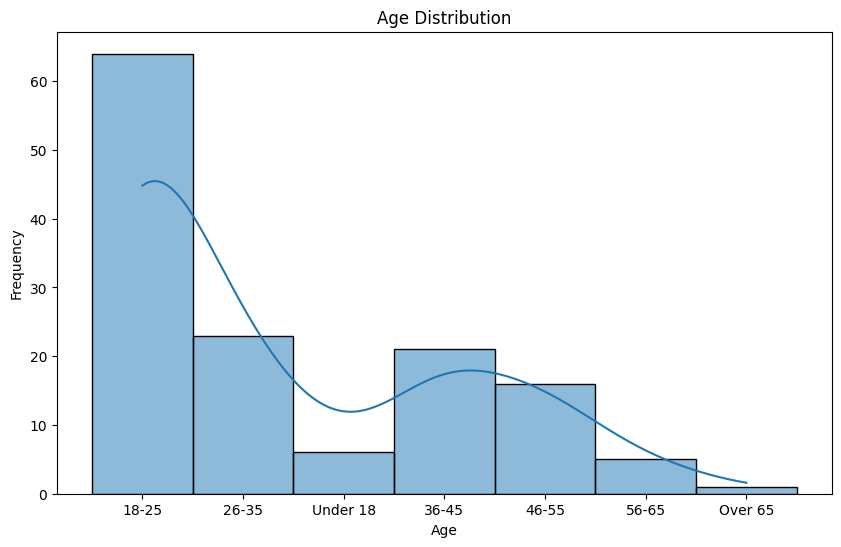

In [ ]:
# Histogram for a continuous variable (e.g., age)
plt.figure(figsize=(10, 6))
sns.histplot(df['What is your age group?'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


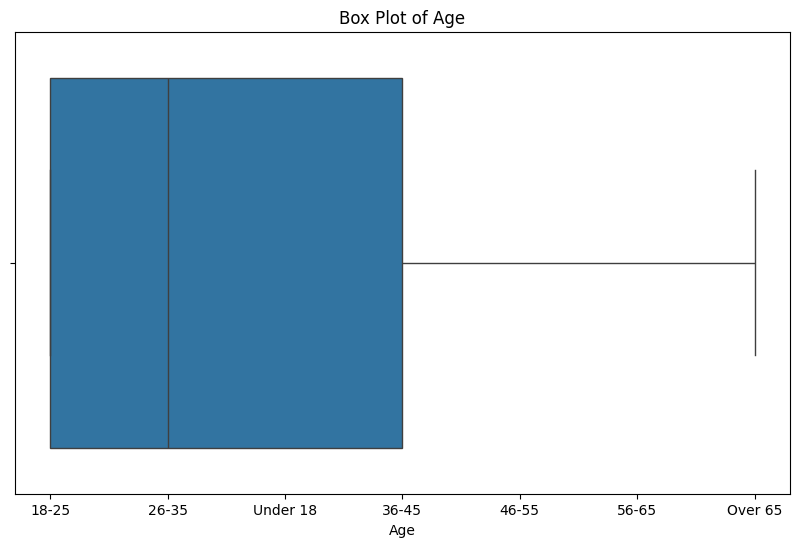

In [ ]:
# Box plot for age or any continuous variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['What is your age group?'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


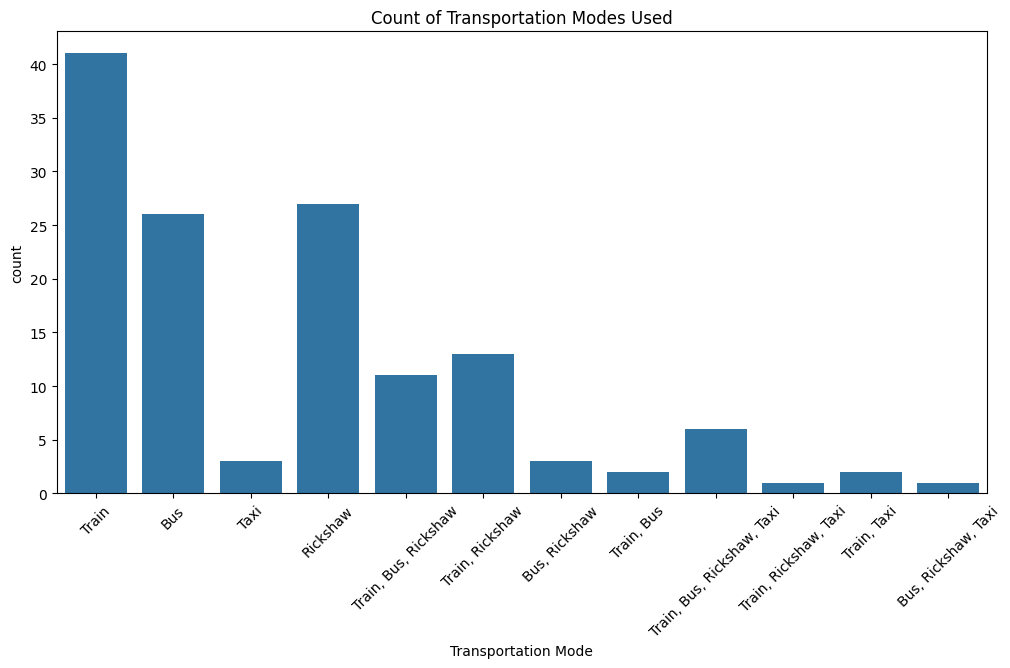

In [ ]:
# Count plot for transportation mode
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='What modes of public transportation do you typically use?')
plt.title('Count of Transportation Modes Used')
plt.xlabel('Transportation Mode')
plt.xticks(rotation=45)
plt.show()


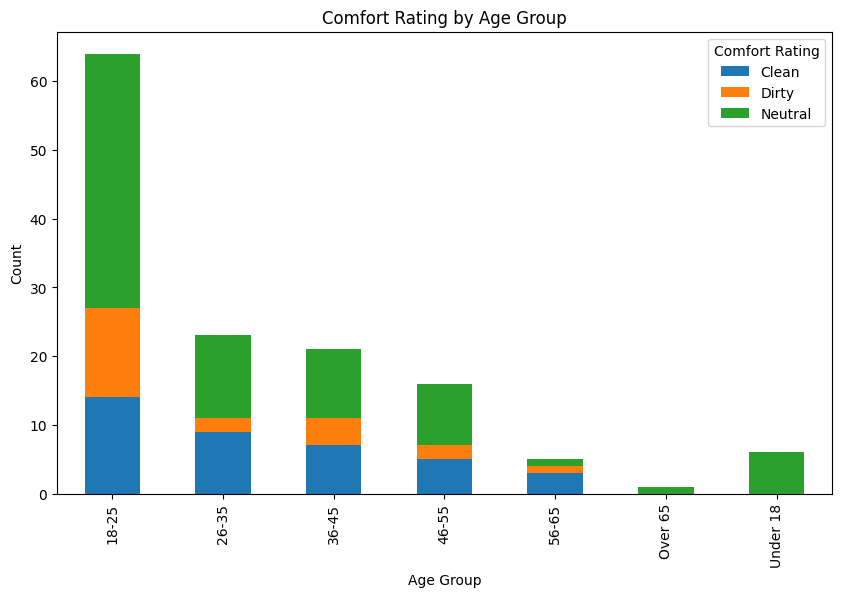

In [ ]:
# Stacked bar plot example for two categorical variables
ct = pd.crosstab(excel_data['What is your age group?'], excel_data['How would you rate the cleanliness of public transportation vehicles?'])
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Comfort Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Comfort Rating')
plt.show()


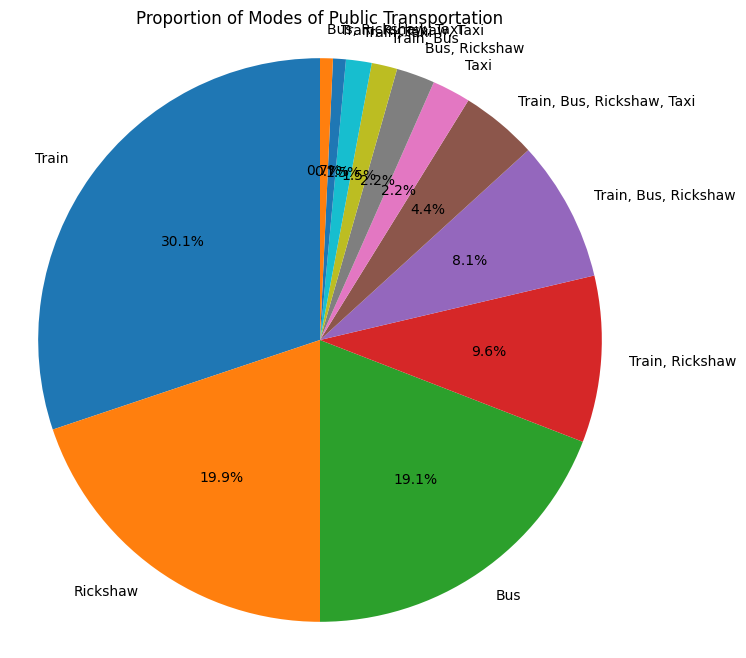

In [ ]:
# Pie chart for a categorical variable
mode_counts = excel_data['What modes of public transportation do you typically use?'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Modes of Public Transportation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Example data
travel_times = excel_data.random.randint(10, 60, 50)  # Random travel times in minutes
satisfaction_scores = excel_data.random.randint(1, 6, 50)  # Random satisfaction scores

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(travel_times, satisfaction_scores, alpha=0.7, color='purple')
plt.title('Travel Time vs. Satisfaction Score')
plt.xlabel('Travel Time (minutes)')
plt.ylabel('Satisfaction Score')
plt.axhline(y=3, color='red', linestyle='--')  # Reference line for average satisfaction
plt.show()


AttributeError: 'DataFrame' object has no attribute 'random'

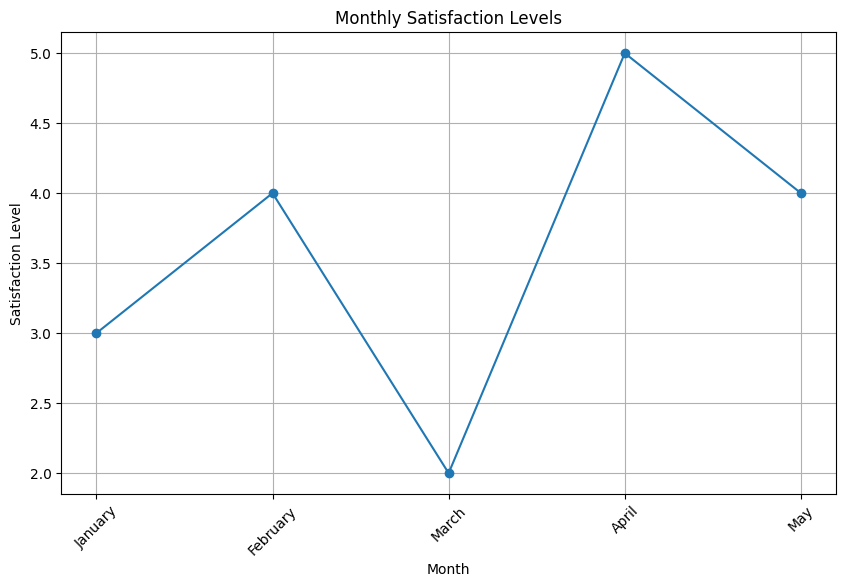

In [ ]:
# Example data: Satisfaction levels over different months
months = ['January', 'February', 'March', 'April', 'May']
satisfaction = [3, 4, 2, 5, 4]

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(months, satisfaction, marker='o')
plt.title('Monthly Satisfaction Levels')
plt.xlabel('Month')
plt.ylabel('Satisfaction Level')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
from scipy import stats

groups = excel_data.groupby('How responsive is the public transportation authority to complaints and feedback?')['Would you like to see more eco-friendly public transportation options (e.g., electric buses)?'].apply(list)
anova_results = stats.f_oneway(*groups)

print(f"F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U5'), dtype('<U5')) -> None

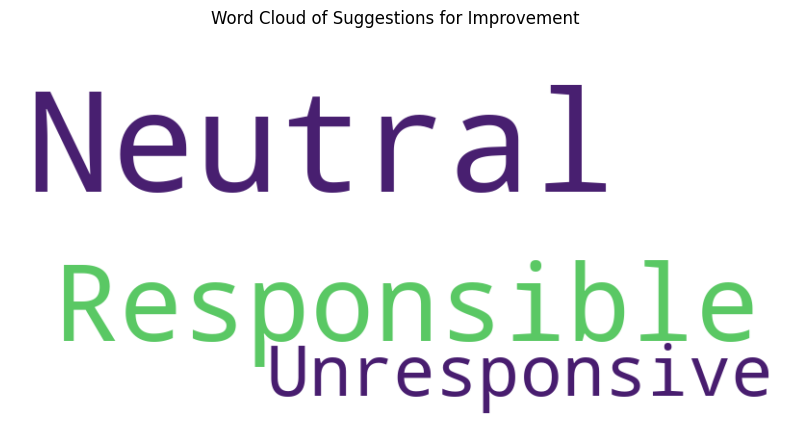

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for suggestions
suggestions = excel_data['How responsive is the public transportation authority to complaints and feedback?'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(suggestions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Suggestions for Improvement')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(excel_data['What modes of public transportation do you typically use?'].value_counts())
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("There is a significant association between Transport Mode and Satisfaction Level.")
else:
    print("No significant association found.")


Chi-Square Test Results:
Chi2 Statistic: 0.0, p-value: 1.0
No significant association found.


In [ ]:
import pandas as pd
from scipy import stats

# Load the data
file_path = '/Local public Transportation Survey (Responses).xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())

# Check the unique values in the 'Transport Mode' and 'Satisfaction Level' columns
print(data['How safe do you feel when using public transportation?'].unique())
print(data['How comfortable do you find the public transportation options available?'].unique())

# Group the data by 'Transport Mode' and collect satisfaction levels
groups = data.groupby('How safe do you feel when using public transportation?')['How comfortable do you find the public transportation options available?'].apply(list)

# Perform ANOVA
anova_results = stats.f_oneway(*groups)

# Display the ANOVA results
print("ANOVA Results:")
print(f"F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")

# Interpret the results
if anova_results.pvalue < 0.05:
    print("There is a statistically significant difference between the means of different transport modes.")
else:
    print("No statistically significant difference found between the means of different transport modes.")


                Timestamp                Full Name  \
0 2024-07-21 13:49:03.735     Ronit Santosh Shetye   
1 2024-07-21 13:58:15.198          Manthan p more    
2 2024-07-21 13:59:30.068    Ayush Navnath Sarode    
3 2024-07-21 14:02:25.778      Shweta Govind More    
4 2024-07-21 14:14:09.971  Srushti Jitendra Patil    

                        Gmail What is your age group?  \
0   ronitshetye0523@gmail.com                   18-25   
1    moremanthan786@gmail.com                   18-25   
2        ayushhh073@gmail.com                   18-25   
3    Shwetamore2127@gmail.com                   18-25   
4  srushti2512patil@gmail.com                   18-25   

  What is your primary occupation?  \
0                          Student   
1               Employed Full-time   
2                          Student   
3               Employed Part-time   
4                          Student   

  How often do you use public transportation?  \
0                                       Daily   
1    

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U13'), dtype('<U13')) -> None

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset (Replace 'complaints_column' with your actual column name)
df = pd.read_excel('/Local public Transportation Survey (Responses).xlsx')

# Assuming 'complaints_column' is the column containing the open-ended complaints text
complaints = df['complaints_column'].dropna()

# Define a function to clean and tokenize the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords (common words like 'the', 'is', 'and')
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Apply cleaning function to the complaints data
all_words = []
for complaint in complaints:
    all_words.extend(clean_text(complaint))

# Count the frequency of each word
word_freq = Counter(all_words)

# Display the 10 most common complaints
most_common_words = word_freq.most_common(10)
print("Most common complaints:", most_common_words)

# Plot the most common complaints as a bar chart
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.title("Most Common Complaints")
plt.xlabel("Complaint")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud for a better visual representation
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


KeyError: 'complaints_column'

How often do you use public transportation?
Daily                   86
Rarely                  20
Several times a week    17
Monthly                  6
Weekly                   4
Never                    3
Name: count, dtype: int64


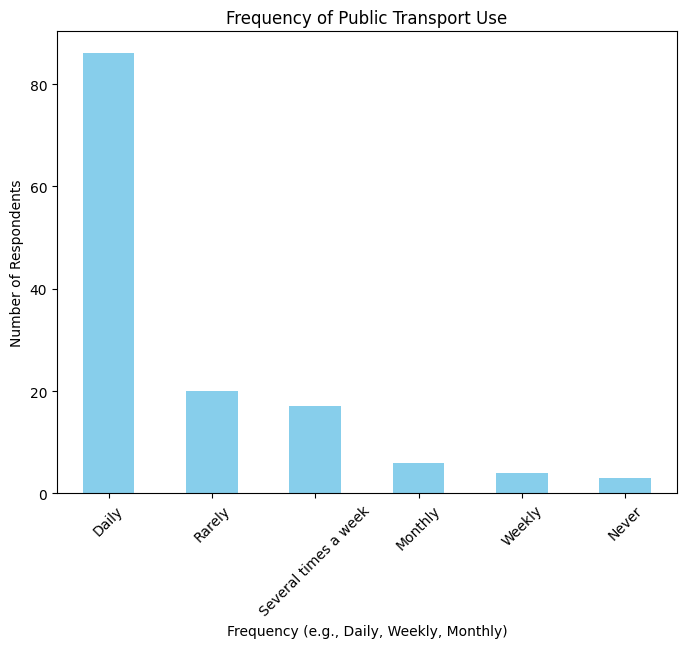

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file (replace 'your_column_name' with the actual column name for frequency of use)
df = pd.read_excel('/Local public Transportation Survey (Responses).xlsx')

# Drop any NaN values in the frequency of use column
df = df.dropna(subset=['How often do you use public transportation?'])

# Count the frequency of each response
frequency_counts = df['How often do you use public transportation?'].value_counts()

# Display the frequency counts
print(frequency_counts)

# Plot the frequency of use as a bar chart
plt.figure(figsize=(8, 6))
frequency_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Public Transport Use')
plt.xlabel('Frequency (e.g., Daily, Weekly, Monthly)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()
